# <span style = "color: green" >Simple Linear Regression Project (Gold Price Prediction) </span>

#### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Read 'gold_price_usd.csv' & store it in a variable

In [2]:
data = pd.read_csv('gold_price_usd.csv')

#### View the first 5 rows

In [3]:
data.head()

,Date,USD (AM)
0,2001-01-02,272.80
1,2001-01-03,269.00
2,2001-01-04,268.75
3,2001-01-05,268.00
4,2001-01-08,268.60


#### Check the information

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4718 non-null   object 
 1   USD (AM)  4718 non-null   float64
dtypes: float64(1), object(1)
memory usage: 73.8+ KB


#### Find the columns

In [5]:
data.columns

Index(['Date', 'USD (AM)'], dtype='object')

#### Rename USD (AM) to Price

In [6]:
data.rename(columns={'USD (AM)':'Price'}, inplace= True)

In [7]:
data

,Date,Price
0,2001-01-02,272.80
1,2001-01-03,269.00
2,2001-01-04,268.75
3,2001-01-05,268.00
4,2001-01-08,268.60
...,...,...
4713,2019-08-27,1531.85
4714,2019-08-28,1541.75
4715,2019-08-29,1536.65
4716,2019-08-30,1526.55


#### Check if there are any missing values in the dataset

In [8]:
data.isna().sum()

Date     0
Price    0
dtype: int64

#### Gather the basic statistical information about the dataset

In [9]:
data.describe()

,Price
count,4718.000000
mean,959.990812
std,449.456217
min,256.700000
25%,449.112500
50%,1113.125000
75%,1293.750000
max,1896.500000


#### Convert Date column from object to datetime format

In [10]:
data['Date']=pd.to_datetime(data['Date'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4718 non-null   datetime64[ns]
 1   Price   4718 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 73.8 KB


#### Create a new columns with Year and Month

In [12]:
data['Month'] = data.Date.apply(lambda time: time.month)

In [13]:
data['Year'] = data.Date.apply(lambda time: time.year)

In [14]:
data.head()

,Date,Price,Month,Year
0,2001-01-02,272.80,1,2001
1,2001-01-03,269.00,1,2001
2,2001-01-04,268.75,1,2001
3,2001-01-05,268.00,1,2001
4,2001-01-08,268.60,1,2001


#### Let's take a look at all the years and Months in our dataset

In [15]:
#Years

In [16]:
data.Year.unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [17]:
#Months

In [18]:
data.Month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

## <span style = "color: orange" >Visualization</span>

### Create a regression plot with x-axis as years and y-axis as Price

<Figure size 864x1440 with 0 Axes>

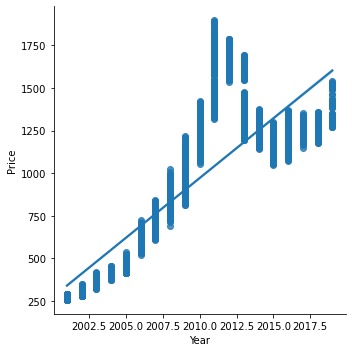

<Figure size 864x1440 with 0 Axes>

In [19]:
sns.lmplot(x='Year', y='Price', data = data)
plt.tight_layout()
plt.figure(figsize=(12,20))

### Plot a histplot to find the variation in price

<AxesSubplot:xlabel='Price', ylabel='Count'>

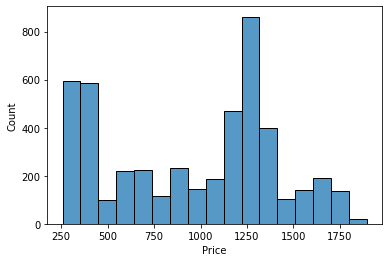

In [20]:
sns.histplot(data = data, x='Price')

### Assign year and price in x and y variables

In [21]:
X = data[['Year']]
y = data['Price']

### Split the data into traning and testin set

We will train our model on the training set and then use the test set to evaluate the model

In [22]:
# import train_test split
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=100)

## Train Data

In [24]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

### Create Linear Regression Model

In [25]:
model = LinearRegression()

### Train the  model

In [26]:
model.fit(X_train, y_train)

LinearRegression()

### Check the score of our model

In [27]:
model.score(X_train, y_train)

0.7048691960223057

### Check the coefficient and Intercept

In [28]:
#print the intercept


In [29]:
model.intercept_

-140074.3237477938

In [30]:
#print the coefficent


In [31]:
model.coef_

array([70.17366927])

### Make Prediction with Test data

In [32]:
# Also store the predicted values in a variable
y_pred=model.predict(X_test)

In [33]:
y_pred

array([ 553.70946788,  413.36212934, 1185.27249131, ..., 1115.09882204,
        343.18846007, 1536.14083765])

In [34]:
X_test.reset_index(drop=True, inplace= True)
X_test

,Year
0,2004
1,2002
2,2013
3,2007
4,2009
...,...
1411,2009
1412,2013
1413,2012
1414,2001


In [35]:
X_test['Actual Values']= y_test.values

In [36]:
X_test['Predicted Values']= y_pred

### Create a new dataframe with actual and predicted values with year(X_test) as index

In [37]:
X_test.set_index('Year')

,Actual Values,Predicted Values
Year,,
2004,425.50,553.709468
2002,307.80,413.362129
2013,1335.75,1185.272491
2007,687.25,764.230476
2009,924.75,904.577814
...,...,...
2009,1088.00,904.577814
2013,1250.75,1185.272491
2012,1776.50,1115.098822


### Check the mean absolute error, mean square error

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
# Mean absolute error
mean_absolute_error(y_test, y_pred)

186.2427389387351

In [40]:
# Mean squared error
mean_squared_error(y_test, y_pred)

58032.97376893088

### Predict the prices for the following years
   * 2025, 2026, 2027, 2028, 2030

In [41]:
pred = np.array([2025, 2026, 2027, 2028, 2030]).reshape(-1,1)

In [42]:
new_pred= model.predict(pred)

C:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [43]:
new_pred

array([2027.35652254, 2097.53019181, 2167.70386108, 2237.87753035,
       2378.22486888])